In [32]:
import numpy as np
from scipy.stats import norm
import scipy
import matplotlib.pyplot as plt

In [135]:
N=1000

In [6]:
def transition_prob(i,j,N):
    if j == i+1:
        return ((N-i)*(N-i-1)*(N-i-2))/((N)*(N-1)*(N-2))
    if j == i-1:
        return ((N-i)*(i)*(i-1))/((N)*(N-1)*(N-2))
    if j == i:
        return i/N + (2*(N-i)*(i)*(N-i-1))/((N)*(N-1)*(N-2))
    else:
        return 0

In [136]:
M = np.array([[transition_prob(i,j,N) for j in range(1,N-1)] for i in range(1, N-1)])

In [93]:
M

array([[3.00000000e-02, 9.70000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.02020202e-04, 5.91919192e-02, 9.40606061e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.99876314e-04, 8.75881262e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.62374768e-01, 2.47371676e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.87940631e-02, 9.71199753e-01, 6.18429190e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.95959596e-02, 9.80404040e-01]])

In [18]:
def transition_prob_2(i,j,N):
    if j == i+2:
        return ((N-i)*(N-i-1)*(N-i-2)*(N-i-3))/((N)*(N-1)*(N-2)*(N-3))
    if j == i+1:
        return 4*((N-i)*(N-i-1)*(N-i-2)*(i))/((N)*(N-1)*(N-2)*(N-3))
    if j == i-1:
        return 2*((N-i)*(i)*(i-1)*(i-2))/((N)*(N-1)*(N-2)*(N-3))
    if j == i:
        return ((i)*(i-1))/(N*(N-1)) + 5*((N-i)*(N-i-1)*(i)*(i-1))/((N)*(N-1)*(N-2)*(N-3))
    else:
        return 0

In [40]:
N=100

In [41]:
M = np.array([[transition_prob_2(i,j,N) for j in range(2,N-1)] for i in range(2, N-1)])

In [26]:
M

array([[0.4       , 0.53333333, 0.06666667],
       [0.1       , 0.7       , 0.2       ],
       [0.        , 0.26666667, 0.73333333]])

In [42]:
e_values, e_vectors = np.linalg.eig(np.transpose(M))
#dist = np.where(e_values == 1)

In [43]:
np.where(1 - e_values <= 0.00000000000001)

(array([59], dtype=int64),)

In [44]:
e_values[59]

(1.000000000000002+0j)

In [148]:
e_vectors = np.where(np.iscomplex(e_vectors) == True, 0, e_vectors)

In [45]:
np.transpose(e_vectors)[59]

array([-1.53683854e-27+0.j, -5.50957726e-24+0.j,  4.39546942e-23+0.j,
       -3.18665556e-21+0.j,  2.37570001e-20+0.j, -3.22044481e-19+0.j,
        5.62783847e-19+0.j,  2.45609203e-19+0.j, -5.42372875e-18+0.j,
       -1.18163435e-17+0.j, -1.21564699e-16+0.j, -1.24288420e-16+0.j,
       -9.21661240e-17+0.j,  1.78600237e-16+0.j,  3.79586483e-16+0.j,
        4.79076843e-16+0.j,  2.49769315e-16+0.j,  4.66040923e-16+0.j,
        4.54766613e-17+0.j, -1.58273958e-17+0.j, -3.06947138e-16+0.j,
       -1.87191478e-16+0.j, -2.55189656e-16+0.j, -2.18764964e-16+0.j,
       -3.84844214e-17+0.j, -2.38495006e-17+0.j,  2.25520064e-16+0.j,
        1.14748620e-16+0.j,  1.09545092e-16+0.j, -1.81960849e-16+0.j,
       -5.06205650e-16+0.j, -1.13179431e-15+0.j, -3.88867462e-15+0.j,
       -2.97637702e-14+0.j, -2.79956116e-13+0.j, -2.50101609e-12+0.j,
       -2.04058666e-11+0.j, -1.51372015e-10+0.j, -1.02172472e-09+0.j,
       -6.28280651e-09+0.j, -3.52392513e-08+0.j, -1.80481836e-07+0.j,
       -8.44915548e-

In [123]:
a = np.round(np.transpose(e_vectors)[56], decimals=14)

In [125]:
a = a/sum(a)

C:\Users\konst\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


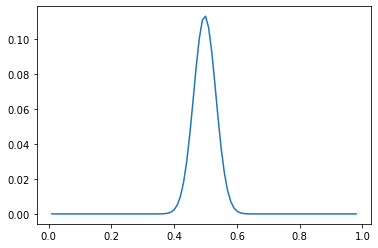

In [133]:
plt.plot([i/N for i in range(1,N-1)], a)

C:\Users\konst\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


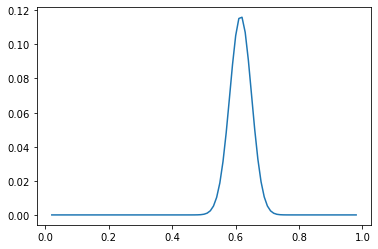

In [47]:
b = np.transpose(e_vectors)[59]
b = b/sum(b)
plt.plot([i/N for i in range(2,N-1)], b)

In [56]:
b[60]

(0.11590034341772273-0j)

In [155]:
np.std(b)

0.004928384469918001

In [157]:
norm.pdf(x, 0.5, np.std(b))

0.24197072451914337

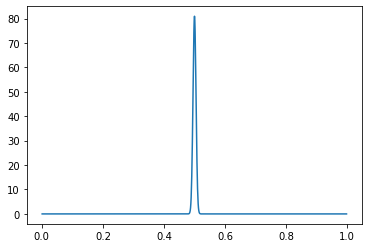

In [158]:
x = [i/N for i in range(1,N-1)]
plt.plot(x, norm.pdf(x, 0.5, np.std(b)))

In [48]:
np.iscomplex(e_values[0])

False

In [73]:
e_values[56]

(0.999999999999998+0j)

In [74]:
dist = np.transpose(e_vectors)[56]
#dist = dist/sum(dist)
dist

array([-1.58413280e-20+0.j, -4.40066275e-19+0.j, -2.59977615e-18+0.j,
        5.89282593e-17+0.j,  6.91973751e-16+0.j,  8.52293280e-16+0.j,
        1.24702596e-15+0.j,  9.99180632e-16+0.j,  7.12338664e-16+0.j,
        2.74709679e-16+0.j, -2.87708560e-16+0.j, -8.86198694e-16+0.j,
       -1.58997976e-15+0.j, -2.18164548e-15+0.j, -2.74059735e-15+0.j,
       -3.09849987e-15+0.j, -3.32901335e-15+0.j, -3.50352333e-15+0.j,
       -3.36671011e-15+0.j, -3.28741694e-15+0.j, -3.03263887e-15+0.j,
       -4.64450008e-15+0.j, -2.86228854e-14+0.j, -2.80172486e-13+0.j,
       -2.61307270e-12+0.j, -2.20010758e-11+0.j, -1.66973870e-10+0.j,
       -1.14473433e-09+0.j, -7.10523898e-09+0.j, -4.00098360e-08+0.j,
       -2.04781516e-07+0.j, -9.54339655e-07+0.j, -4.05594352e-06+0.j,
       -1.57429893e-05+0.j, -5.58809974e-05+0.j, -1.81613242e-04+0.j,
       -5.41022029e-04+0.j, -1.47876789e-03+0.j, -3.71188702e-03+0.j,
       -8.56351370e-03+0.j, -1.81713583e-02+0.j, -3.54879664e-02+0.j,
       -6.38233194e-

In [68]:
sum(dist)

0.9999999999999999